In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
df = pd.read_csv('3.2 Countries_exercise.csv.csv')

In [4]:
df.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [5]:
df.shape

(241, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
name         241 non-null object
Longitude    241 non-null float64
Latitude     241 non-null float64
dtypes: float64(2), object(1)
memory usage: 5.7+ KB


In [7]:
df.isnull().sum()

name         0
Longitude    0
Latitude     0
dtype: int64

Text(0,0.5,'Latitude')

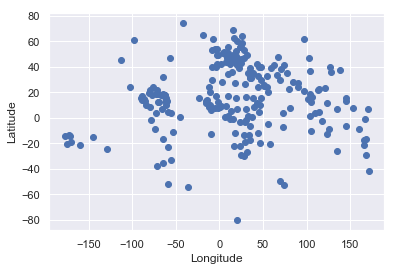

In [8]:
plt.scatter(df.Longitude,df.Latitude)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [9]:
x = df.iloc[:,[1,2]]

In [10]:
x.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


## KMeans Clustering 

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=3)

In [13]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Clustering Results

In [14]:
identified_cluster = kmeans.predict(x)

In [15]:
identified_cluster

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 1, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1,
       2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 0,
       0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0])

In [16]:
data_with_clusters = df.copy()

In [17]:
data_with_clusters['Identified_clusters'] = identified_cluster

In [18]:
data_with_clusters.head()

,name,Longitude,Latitude,Identified_clusters
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0


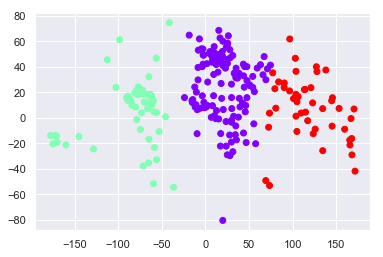

In [19]:
#Plotting 

plt.scatter(data_with_clusters.Longitude,data_with_clusters.Latitude,c=data_with_clusters.Identified_clusters,cmap='rainbow')

In [20]:
data = pd.read_csv('5.1 Categorical.csv.csv')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
name         241 non-null object
Longitude    241 non-null float64
Latitude     241 non-null float64
continent    241 non-null object
dtypes: float64(2), object(2)
memory usage: 7.6+ KB


In [22]:
data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


In [23]:
#encoding to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
data.continent = le.fit_transform(data.continent)

In [38]:
x = data.iloc[:,1:]

In [33]:
#x = x.reshape(-1,1)

In [39]:
x

,Longitude,Latitude,continent
0,-69.982677,12.520880,4
1,66.004734,33.835231,2
2,17.537368,-12.293361,0
3,-63.064989,18.223959,4
4,20.049834,41.142450,3
5,19.953288,60.214887,3
6,1.560544,42.542291,3
7,54.300167,23.905282,2
8,-65.179807,-35.381349,7
9,44.929933,40.289526,2


In [40]:
kmeans_2 = KMeans(2)

In [41]:
kmeans_2.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
indentified_clusters = kmeans_2.predict(x)

In [43]:
data['indentified_clusters'] = indentified_clusters

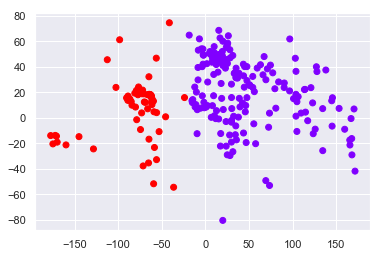

In [44]:
plt.scatter(data.Longitude,data.Latitude,c=data.indentified_clusters,cmap='rainbow')

## Elbow Method

In [45]:
#within_cluster sum of squares of cluster 2 
kmeans_2.inertia_

657632.5205587766

In [47]:
wcss = []
for i in range(1,7):
    kmeans_2 = KMeans(i)
    kmeans_2.fit(x)
    wcss_iter = kmeans_2.inertia_
    wcss.append(wcss_iter)

In [48]:
wcss

[1414804.1279672072,
 657632.5205587766,
 325737.77951675956,
 257094.2913723461,
 192715.93110299908,
 152555.38539836946]

In [49]:
No_of_clusters = range(1,7)

In [52]:
print(list(No_of_clusters))

[1, 2, 3, 4, 5, 6]


## PLotting Elbow curve

Text(0,0.5,'Within_cluster sum of squares')

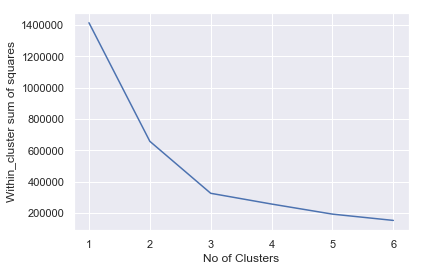

In [54]:
plt.plot(No_of_clusters,wcss)
plt.xlabel('No of Clusters')
plt.ylabel('Within_cluster sum of squares')

In [11]:
df_new = df.iloc[:,[1,2]]

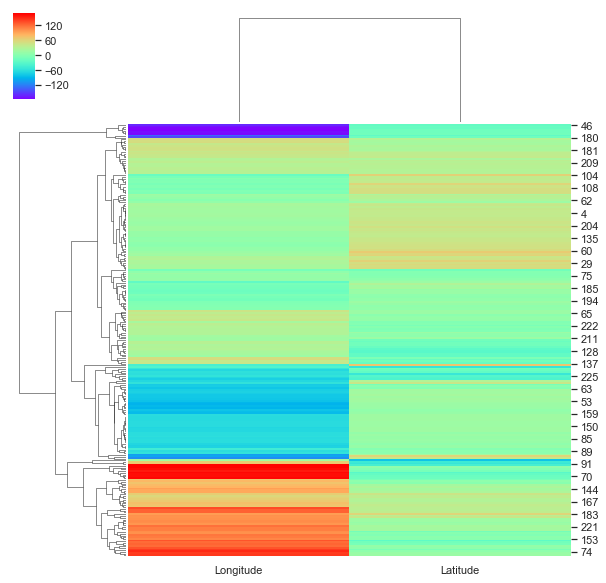

In [14]:
sns.clustermap(df_new,cmap='rainbow')